<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/I2K_2023/z4_littlest_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import data,filters
from matplotlib import pyplot as plt

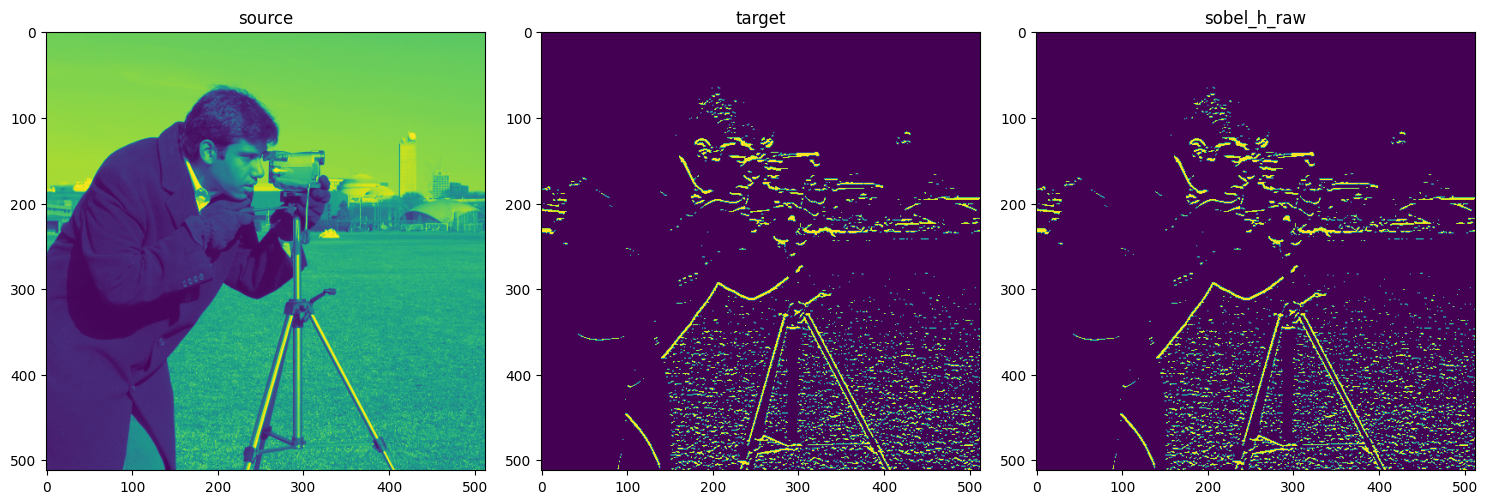

In [2]:
img = data.camera()
sobel_h = filters.sobel_h(img)>0.07
target = sobel_h>0.07
fig,ax=plt.subplots(1,3,figsize=(15,25))
ax[0].imshow(img)
ax[0].set_title('source')
ax[1].imshow(target)
ax[1].set_title('target')
ax[2].imshow(sobel_h)
ax[2].set_title('sobel_h_raw')
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6775: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bins = np.histogram_bin_edges(
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6790: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


(array([[501.,   0.,   0., ...,   0.,   0.,  11.],
        [503.,   0.,   0., ...,   0.,   0.,   9.],
        [503.,   0.,   0., ...,   0.,   0.,   9.],
        ...,
        [487.,   0.,   0., ...,   0.,   0.,  25.],
        [488.,   0.,   0., ...,   0.,   0.,  24.],
        [484.,   0.,   0., ...,   0.,   0.,  28.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 512 BarContainer objects>)

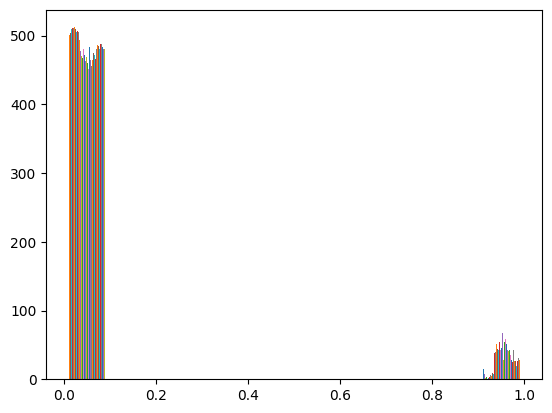

In [3]:
plt.hist(sobel_h)

# Goal is to find out the filter kernel coefficients [3x3] using machine learning logistic regression

In [4]:
from skimage import util
windows = util.view_as_windows(img,(3,3))
img.shape, windows.shape
# if not padding img, then need to trim the target

((512, 512), (510, 510, 3, 3))

In [5]:
# machine learning takes 2D array input
# 260100 samples, each has 9 features

X = np.reshape(windows,(510*510,3*3))
X.shape

(260100, 9)

In [6]:
trim = target[1:-1,1:-1]
y = np.reshape(trim,510*510)

# X and y, start machine learning or logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [9]:
model.fit(X,y)

LogisticRegression(solver='liblinear')

In [15]:
model.coef_

array([[-3.07750871e-01, -6.18724497e-01, -3.08979134e-01,
        -4.83006140e-04, -6.39488047e-04,  3.42671475e-04,
         3.07663913e-01,  6.17414743e-01,  3.06943022e-01]])

In [14]:
np.reshape(np.round(model.coef_*3),(3,3))

array([[-1., -2., -1.],
       [-0., -0.,  0.],
       [ 1.,  2.,  1.]])